# **Tim 17**


1.   Muhammad Akmal Falah
2.   Rafly Al Hakim
3.   Putri Danty Apriani
4.   Thesa Permatasari Djaka
5.   Jeremia Ricardt Gultom


In [1]:
pip install pandas numpy xgboost

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,precision_score,jaccard_score,recall_score,f1_score

import joblib
from google.colab import files

In [3]:
df = pd.DataFrame(pd.read_csv('Bank_Loan_Granting.csv'))

# **Exploratory Data Analysis (EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [5]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Pada data tersebut tidak terdapat data yang hilang

Selanjutnya mengganti tipe data dari fitur CCAvg yang semula bertipe data objek menjadi tipe data float

In [6]:
df['CCAvg'] = df['CCAvg'].str.replace("/" , '.').astype(np.float64)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Dapat di cek sekarang fitur CCAvg bertipe data float

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Seperti yang ditunjukkan dalam describe, ada nilai negatif dalam fitur 'Experience'. Karena Experience adalah beberapa tahun, maka tidak boleh negatif dan harus benar.

Selanjutnya mengubah nilai negatif pada fitur 'Experience' dengan Nilai Absolutnya

In [9]:
df['Experience'] = df['Experience'].abs()
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Setelah itu, mengubah Income (Pendapatan) tahunan menjadi Pendapatan bulanan

 Income (Pendapatan) adalah pendapatan 'tahunan' dan CCAvg adalah pengeluaran 'bulanan'. Maka, akan disamakan rentang waktu pendapatan menjadi bulanan dengan membaginya dengan 12.

In [10]:
df['Income'] = df['Income']/12
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,4.083333,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,2.833333,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,0.916667,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,8.333333,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,3.750000,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,3.333333,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,1.250000,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,2.000000,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,4.083333,90034,3,0.5,2,0,0,0,0,1,0


Selanjutnya menghapus fitur yang tidak berguna, yaitu fitur ID.

In [11]:
df = df.drop(['ID'],axis=1)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.083333,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,2.833333,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,0.916667,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,8.333333,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,3.750000,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.333333,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.250000,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.000000,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.083333,90034,3,0.5,2,0,0,0,0,1,0


# **Data Preprocessing dan Data Visualization**

Fitur yang ditargetkan, yaitu fitur 'Personal Loan'

************************************************************************************************************************
number of customers :  5000
The number of Personal Loan = 0 :  4520
The number of Personal Loan = 1 :  480
************************************************************************************************************************


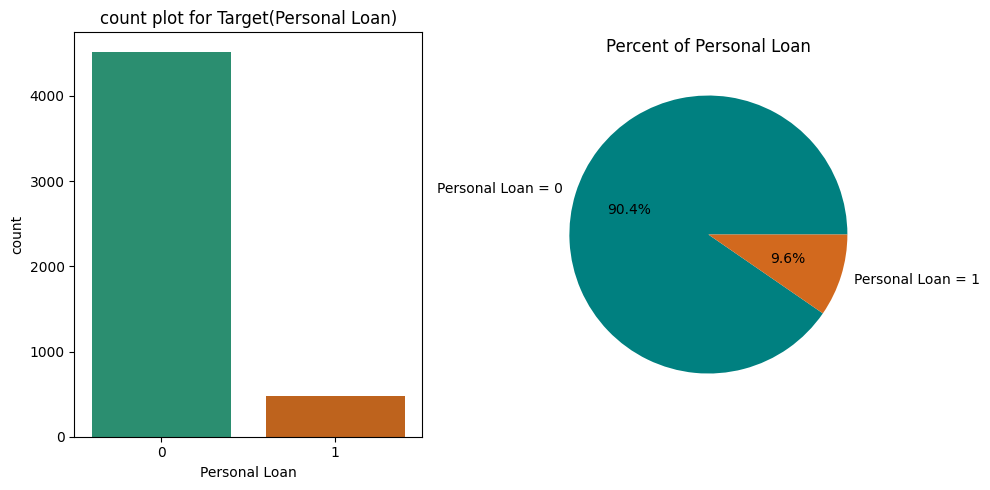

In [12]:
print('*'*120)
print('number of customers : ',df.shape[0])
print('The number of Personal Loan = 0 : ',df['Personal Loan'].value_counts()[0])
print('The number of Personal Loan = 1 : ',df['Personal Loan'].value_counts()[1])
print('*'*120)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Personal Loan',palette = "Dark2")
plt.title("count plot for Target(Personal Loan)")
plt.subplot(1,2,2)
plt.pie([df['Personal Loan'].value_counts()[0],df['Personal Loan'].value_counts()[1]],
        labels=['Personal Loan = 0','Personal Loan = 1'],autopct='%1.1f%%',colors=['teal','chocolate'])
plt.title("Percent of Personal Loan")
plt.tight_layout()
plt.show()

Dapat dilihat pada grafik mayoritas paling banyak adalah kelas 0 dengan 90,4% pelanggan dan minoritas adalah kelas 1 dengan 9,6% pelanggan.

Ada beberapa fitur descrete dan beberapa fitur continues dalam dataset

Untuk fitur 'ZIP Code' adalah fitur diskrit atau kategorikal. Karena kategorinya banyak, kami menganalisisnya secara terpisah.

In [13]:
descrete_col = df[['Family','Education','Securities Account','CD Account','Online','CreditCard']]
continuous_col = df[['Age','Experience','Income','CCAvg','Mortgage']]

Family :  [4 3 1 2]
Education :  [1 2 3]
Securities Account :  [1 0]
CD Account :  [0 1]
Online :  [0 1]
CreditCard :  [0 1]


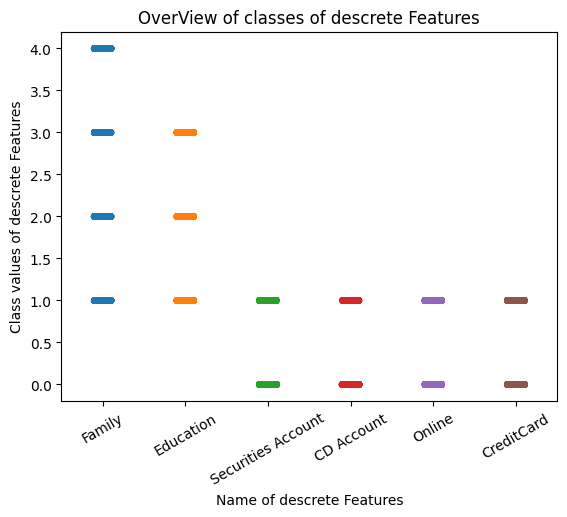

In [14]:
for col in descrete_col :
    print('%s : ' %col , df[col].unique())

ax = sns.stripplot(data=descrete_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Class values of descrete Features')
plt.xlabel('Name of descrete Features')
plt.title('OverView of classes of descrete Features')
plt.show()

Dapat dilihat pada gambar diatas terdapat 7 fitur yang bersifat diskrit

- Family merupakan fitur multinomial dan dapat terdiri dari minimal 1 orang dan paling banyak 4 orang : [1,2,3,4]
- Education adalah fitur multinomial lainnya dan dapat dalam 3 level : [1,2,3]
- 4 fitur sisanya adalah fitur biner dan 0/1 berarti Tidak/Ya



************************************************************************************************************************


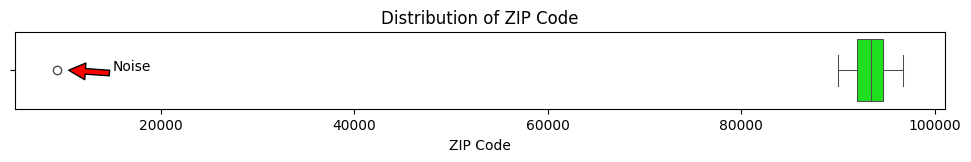

The number of categories in ZIP Code is :  467
There is a noise in zipcode feature, it is the smallest value of it :


,ZIP Code
384,9307
652,90005
1469,90005


The range of ZIP Code without this noise is : (90005 , 96651)


In [15]:
print('\n')
print('*'*120)

plt.figure(figsize=(12,1))
ax = sns.boxplot(x=df['ZIP Code'],color="lime", linewidth=.75)
plt.annotate('Noise',xy=(10500,0),xytext=(15000,0),arrowprops=dict(facecolor='red'))
ax.set_title('Distribution of ZIP Code')
plt.show()
###############################################################################
fig = px.strip(df[df["ZIP Code"]>80000],
         x="Personal Loan",
         y="ZIP Code",
         stripmode='overlay')
fig.update_layout(annotations=[
        dict(
            x=0,
            y=96900,
            text="ZIP Codes 96651 Must Be Checked\n for analysis",
            textangle=0,
            ax=150,
            ay=-50,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1)])

fig.show()
#################################################################################
print('The number of categories in ZIP Code is : ',len(df['ZIP Code'].unique()))
print('There is a noise in zipcode feature, it is the smallest value of it :')
display(df['ZIP Code'].nsmallest(3).to_frame())
print('The range of ZIP Code without this noise is : (%d , %d)'%(df[df['ZIP Code']>80000]['ZIP Code'].min(),
                                           df[df['ZIP Code']>80000]['ZIP Code'].max()))

- Dapat dilihat pada box plot, nilai terkecil ZIP Code adalah angka yang terdiri dari 4 digit, namun sisanya 5 digit.
- ZIP Code berada dalam kisaran batas (90005,96651), tetapi titik ini berada di luar kisaran ini dan sangat jauh dari itu.
- Selain itu, diketahui dari pencarian di internet bahwa kode ini tidak valid karena kode pos di Amerika memiliki 5 digit atau 9 digit. Jadi titik ini adalah sebuah noise.
- Pada stripplot terlihat bahwa nilai Personal Loan untuk ZIP Code apa pun bisa 0 dan 1, kecuali kode pos 96561 yang seluruh nilai Personal Loan adalah 0. Artinya nilai Personal Loan tidak bergantung pada ZIP Code.

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.000000,35.00,45.000000,55.000000,67.000000
Experience,5000.0,20.134600,11.415189,0.000000,10.00,20.000000,30.000000,43.000000
Income,5000.0,6.147850,3.836144,0.666667,3.25,5.333333,8.166667,18.666667
CCAvg,5000.0,1.937938,1.747659,0.000000,0.70,1.500000,2.500000,10.000000
Mortgage,5000.0,56.498800,101.713802,0.000000,0.00,0.000000,101.000000,635.000000


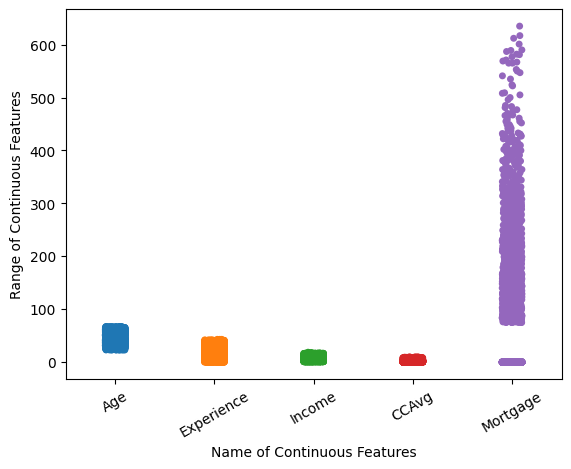

In [16]:
display(continuous_col.describe().T)
ax = sns.stripplot(data=continuous_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Range of Continuous Features')
plt.xlabel('Name of Continuous Features')
plt.show()

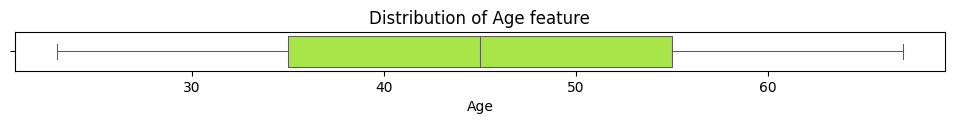

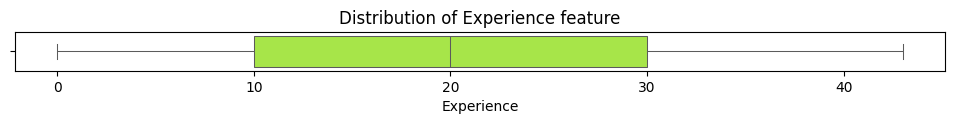

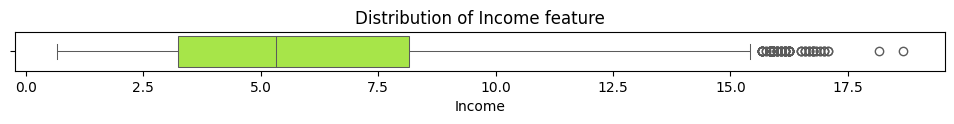

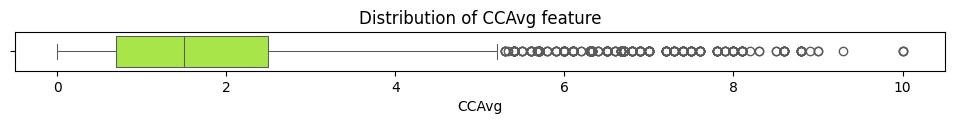

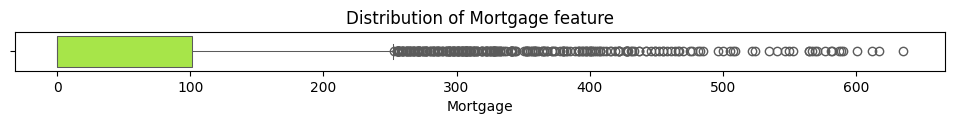

In [17]:
for col in continuous_col.columns:
    plt.figure(figsize=(12,0.5))
    ax = sns.boxplot(x=df[col],color="greenyellow", linewidth=.75)
    ax.set_title(f'Distribution of {col} feature')
    plt.show()

- Seperti yang ditunjukkan pada box plot, pada dua fitur, Age dan Experience, sebaran datanya normal;
- Fitur lain, kami melihat beberapa outlier. Karena menyangkut jumlah uang atau nilai mortgage, jumlahnya bisa berapa pun, dan semuanya masuk akal, jadi tidak bisa menjadi noises.

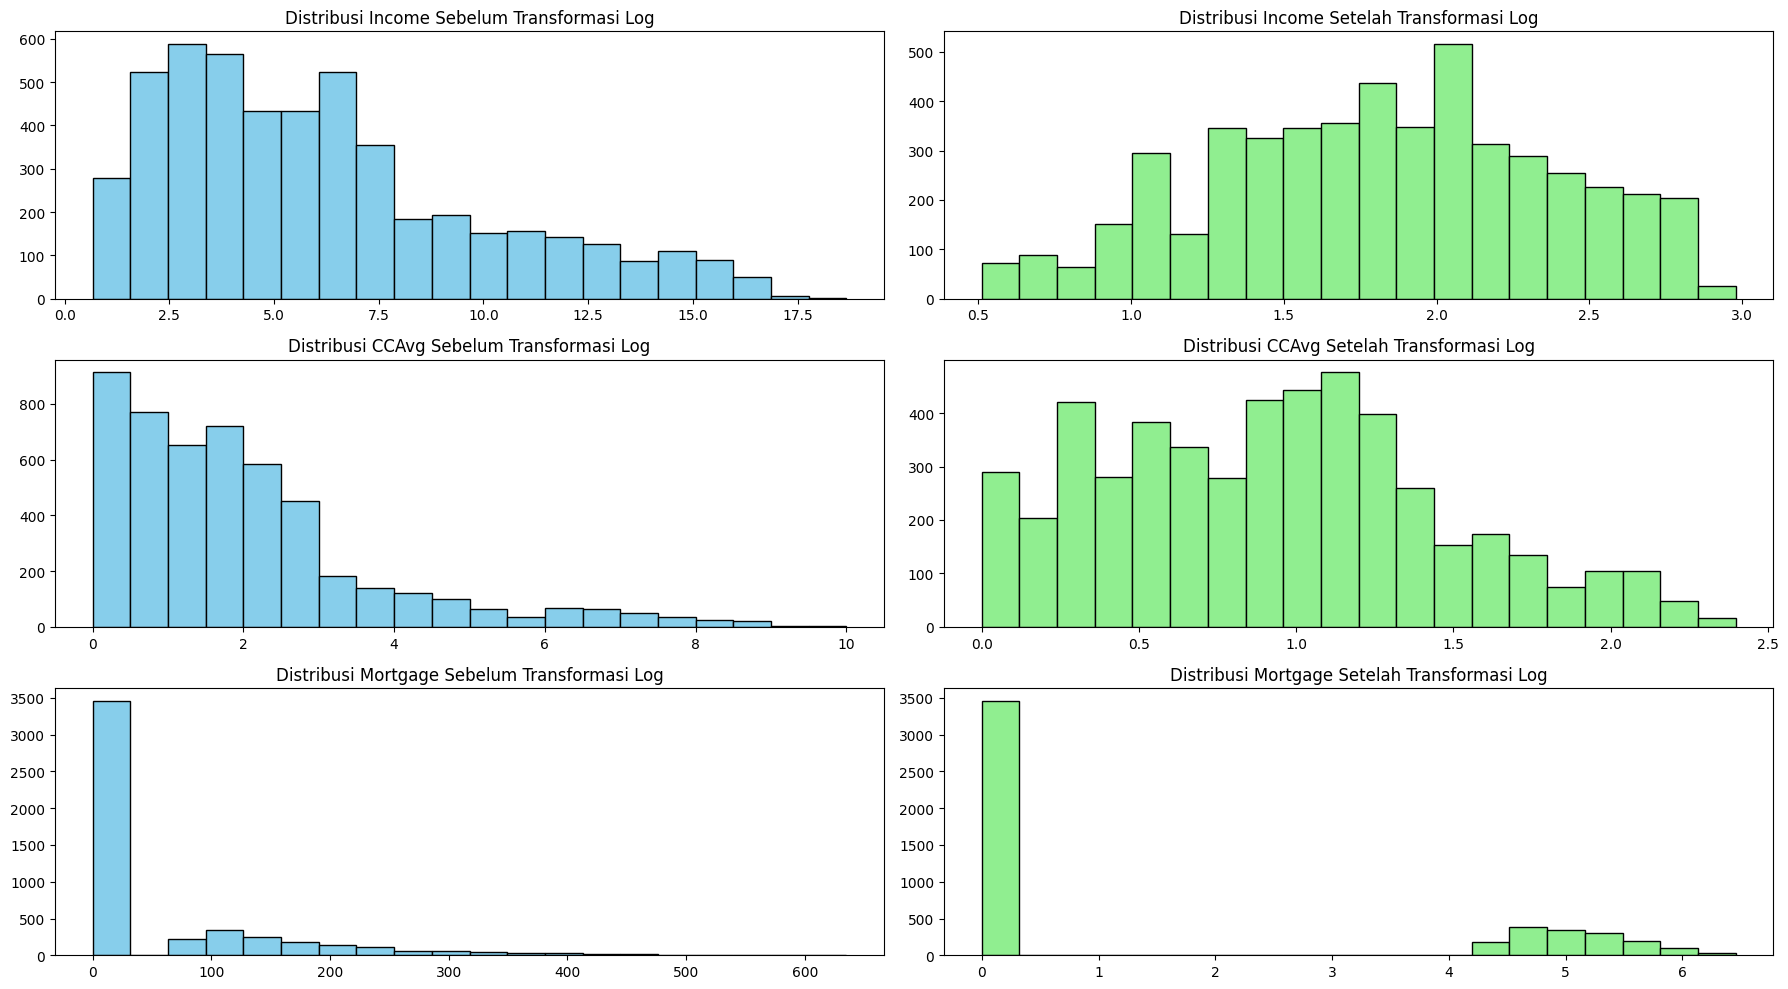

In [18]:
# Transformasi log
df['log_Income'] = np.log1p(df['Income'])
df['log_CCAvg'] = np.log1p(df['CCAvg'])
df['log_Mortgage'] = np.log1p(df['Mortgage'])

# Visualisasi distribusi sebelum dan sesudah transformasi log
plt.figure(figsize=(18, 10))

# Distribusi sebelum transformasi log
plt.subplot(3, 2, 1)
plt.hist(df['Income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Income Sebelum Transformasi Log')

plt.subplot(3, 2, 3)
plt.hist(df['CCAvg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi CCAvg Sebelum Transformasi Log')

plt.subplot(3, 2, 5)
plt.hist(df['Mortgage'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Mortgage Sebelum Transformasi Log')

# Distribusi setelah transformasi log
plt.subplot(3, 2, 2)
plt.hist(df['log_Income'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi Income Setelah Transformasi Log')

plt.subplot(3, 2, 4)
plt.hist(df['log_CCAvg'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi CCAvg Setelah Transformasi Log')

plt.subplot(3, 2, 6)
plt.hist(df['log_Mortgage'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi Mortgage Setelah Transformasi Log')

plt.tight_layout()
plt.show()

In [19]:
df = df.drop(['ZIP Code','Income','CCAvg','Mortgage'],axis=1)
df

,Age,Experience,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,log_Income,log_CCAvg,log_Mortgage
0,25,1,4,1,0,1,0,0,0,1.625967,0.955511,0.000000
1,45,19,3,1,0,1,0,0,0,1.343735,0.916291,0.000000
2,39,15,1,1,0,0,0,0,0,0.650588,0.693147,0.000000
3,35,9,1,2,0,0,0,0,0,2.233592,1.308333,0.000000
4,35,8,4,2,0,0,0,0,1,1.558145,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,1,3,0,0,0,1,0,1.466337,1.064711,0.000000
4996,30,4,4,1,0,0,0,1,0,0.810930,0.336472,4.454347
4997,63,39,2,3,0,0,0,0,0,1.098612,0.262364,0.000000
4998,65,40,3,2,0,0,0,1,0,1.625967,0.405465,0.000000


In [20]:
df.isna().sum()

Age                   0
Experience            0
Family                0
Education             0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
log_Income            0
log_CCAvg             0
log_Mortgage          0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   Education           5000 non-null   int64  
 4   Personal Loan       5000 non-null   int64  
 5   Securities Account  5000 non-null   int64  
 6   CD Account          5000 non-null   int64  
 7   Online              5000 non-null   int64  
 8   CreditCard          5000 non-null   int64  
 9   log_Income          5000 non-null   float64
 10  log_CCAvg           5000 non-null   float64
 11  log_Mortgage        5000 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 468.9 KB


In [22]:
pip install openpyxl

In [23]:
descrete_col = df[['Family','Education','Securities Account','CD Account','Online','CreditCard']]
continuous_col = df[['Age','Experience','log_Income','log_CCAvg','log_Mortgage']]

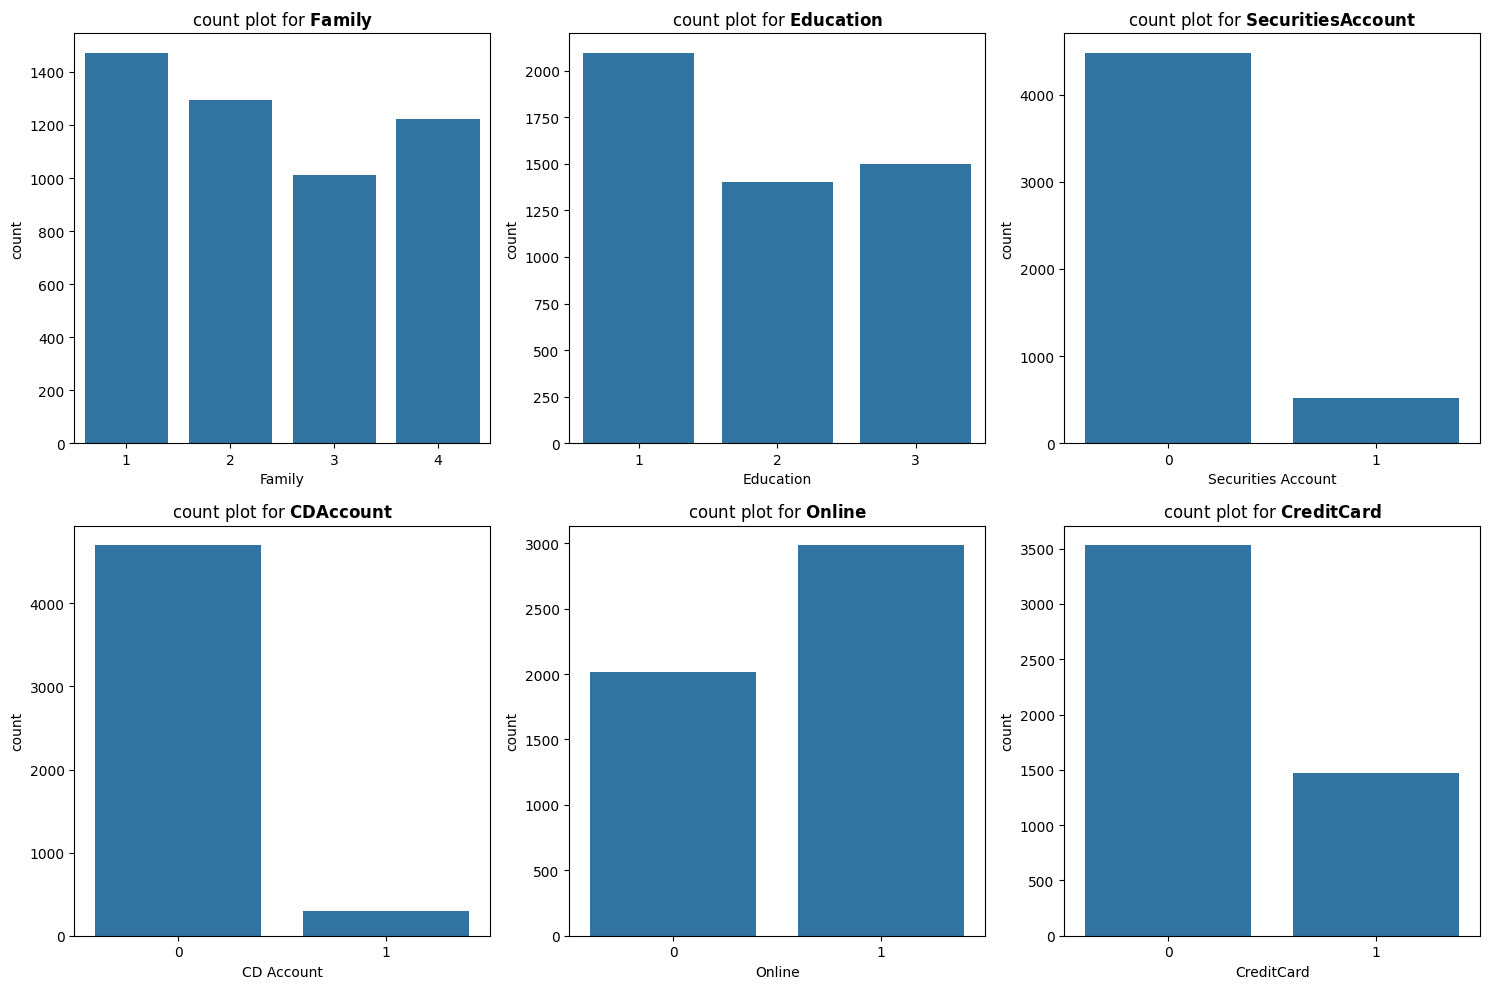

************************************************************************************************************************
Descrete columns name : 
 ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Descrete columns categories : 
 [[4, 3, 1, 2], [1, 2, 3], [1, 0], [0, 1], [0, 1], [0, 1]]
Descrete columns categories count : 
 [[1222, 1010, 1472, 1296], [2096, 1403, 1501], [522, 4478], [4698, 302], [2016, 2984], [3530, 1470]]


************************************************************************************************************************


In [24]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(descrete_col.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col)
    plt.title(f"count plot for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()
#############################################################
descrete_cols_categories=[]
descrete_cols_categories_count=[]

for col in list(descrete_col.columns):
    pie_name1=[]
    pie_value1=[]
    for j in range(len(descrete_col[col].unique())) :
        pie_name1.append(descrete_col[col].unique()[j])
        pie_value1.append(descrete_col[descrete_col[col]==pie_name1[j]][col].count())
    descrete_cols_categories.append(pie_name1)
    descrete_cols_categories_count.append(pie_value1)

print('*'*120)
print('Descrete columns name : \n' , list(descrete_col.columns))
print('Descrete columns categories : \n' , descrete_cols_categories)
print('Descrete columns categories count : \n' , descrete_cols_categories_count)
print('\n')
print('*'*120)
#############################################################
rows = 3
cols = 2

# Create subplots
fig = make_subplots(rows=rows, cols=cols, specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}],
                                           [{"type": "pie"}, {"type": "pie"}]])


for i in range(rows * cols) :
    fig.add_trace(go.Pie(labels=descrete_cols_categories[i], values=descrete_cols_categories_count[i], name=descrete_col.columns[i]),
                  row=int(np.ceil((i+1)/2)), col=(i%2)+1)


fig.update_layout(margin=dict(t=35, b=35, l=35, r=35))
fig.update(layout_title_text='Percent Of values in descrete columns',
           layout_showlegend=True)

fig = go.Figure(fig)
fig.show()

Dapat dilihat pada grafik yaitu :
- dalam hal jumlah family, pelanggan dengan 1 orang keluarga memiliki jumlah pelanggan terbanyak (29,4% dari seluruh pelanggan) dan dengan 3 orang keluarga memiliki jumlah pelanggan paling sedikit (20,2% dari seluruh pelanggan).
- pada education, sebagian besar pelanggan adalah undergraduate (41,9%).
- Sebagian besar nasabah belum memiliki Securities Account(89,6%)
- Hanya sedikit pelanggan yang memiliki CD Account dan sebagian besar tidak memilikinya
- Lebih dari separuh pelanggan menggunakan Online services (59,7%)
- Hanya 29,4% pelanggan yang menggunakan credit card dan sebagian besar tidak menggunakannya

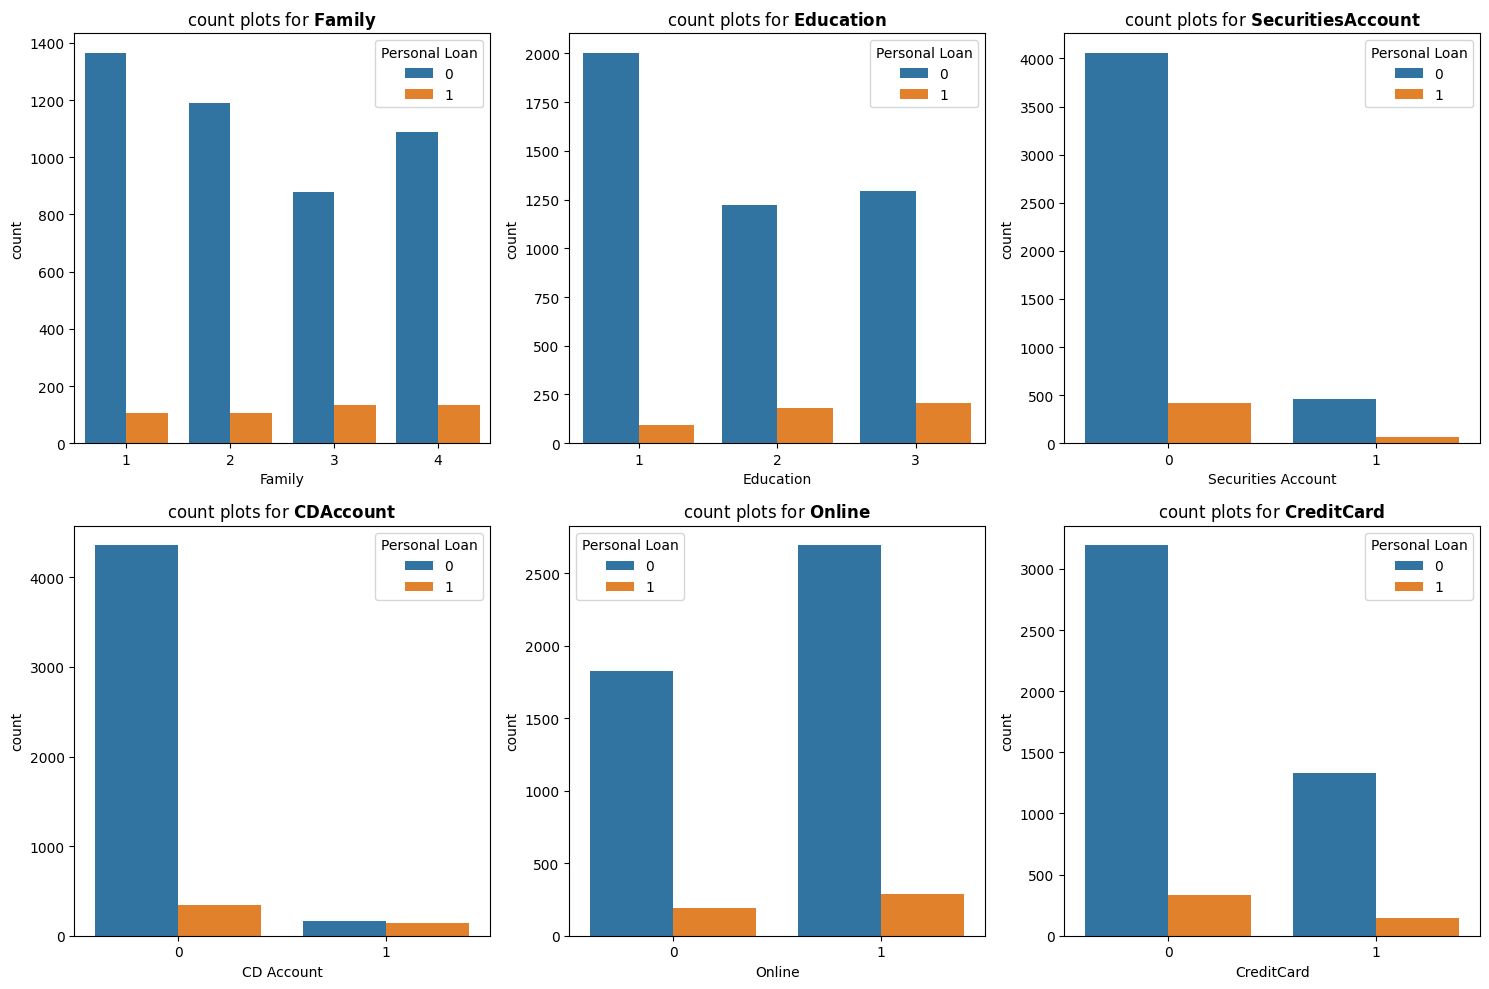

In [25]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(descrete_col.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col,hue='Personal Loan')
    plt.title(f"count plots for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()

Plot ini menunjukkan jumlah pelanggan yang diberikan pinjaman berdasarkan fitur khusus.
- sebagian besar nasabah adalah family dengan 1 orang, namun keluarga dengan 3 dan 4 orang mendapat pinjaman lebih banyak dibandingkan yang lain.
- education sebagian besar nasabah adalah undergraduate, namun nasabah graduate dan professional diberikan pinjaman lebih banyak dibandingkan yang lain.
- Sebagian besar nasabah yang diberi pinjaman tidak memiliki securities account, sehingga menyoroti pentingnya berbagai fitur dalam meningkatkan peluang diberikan pinjaman.
- Sebagian besar pelanggan yang diberikan pinjaman tidak memiliki CD Accounts.
- Kebanyakan nasabah yang diberi pinjaman tidak menggunakan Credit Card.
- Sebagian besar pelanggan yang diberikan pinjaman menggunakan Online services.

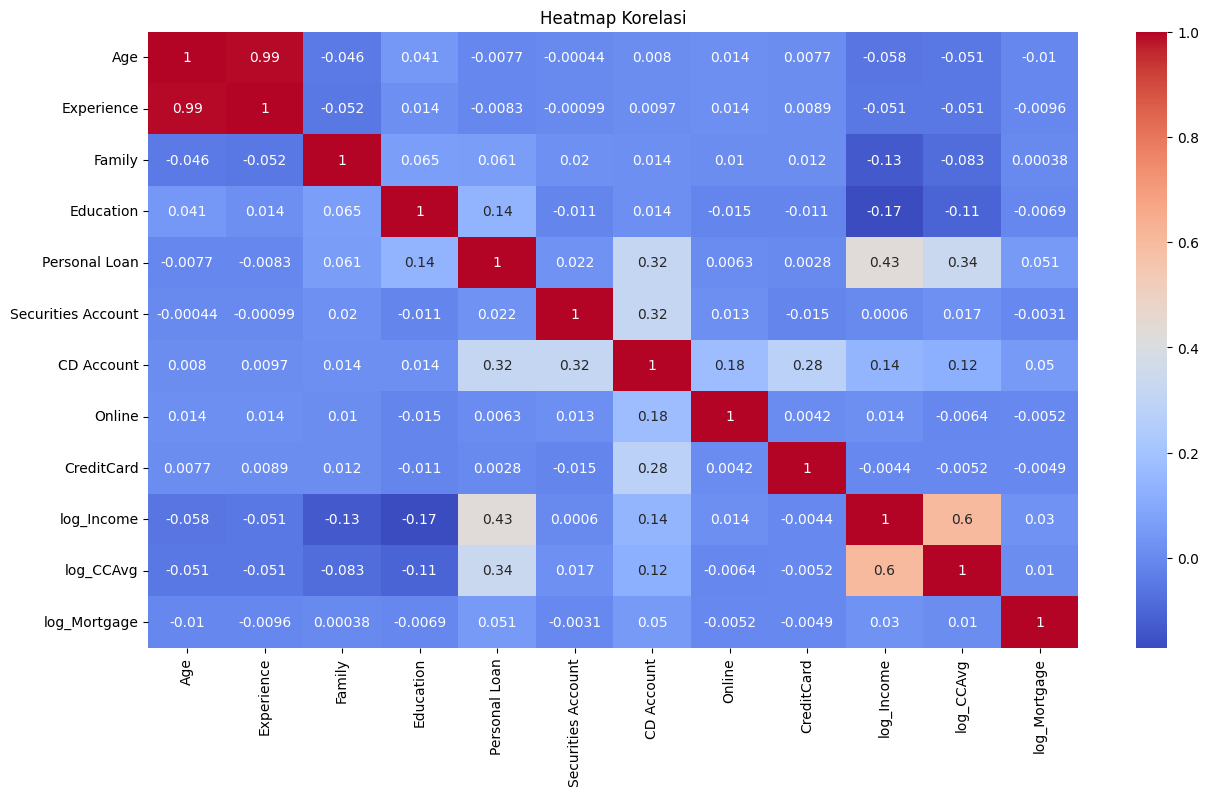

In [26]:
# Membuat heatmap korelasi antar fitur
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

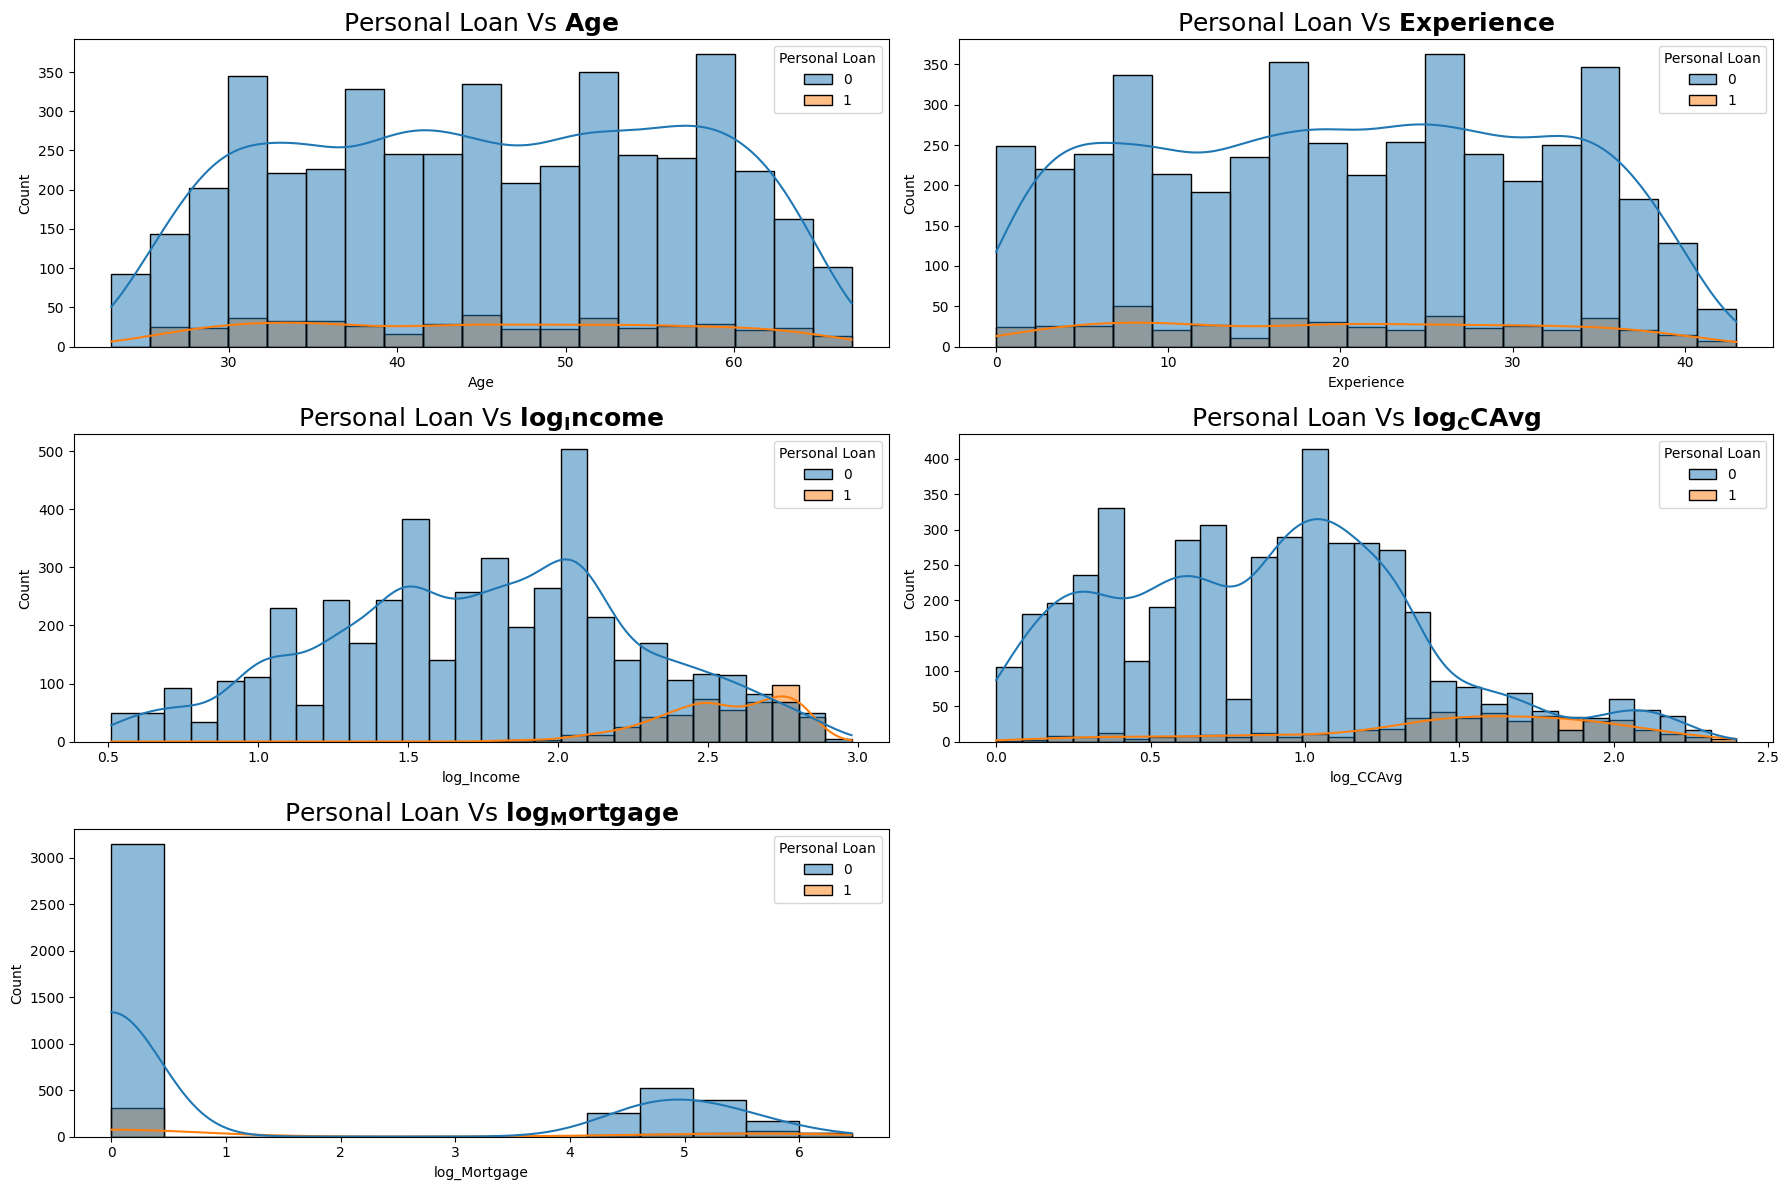



************************************************************************************************************************


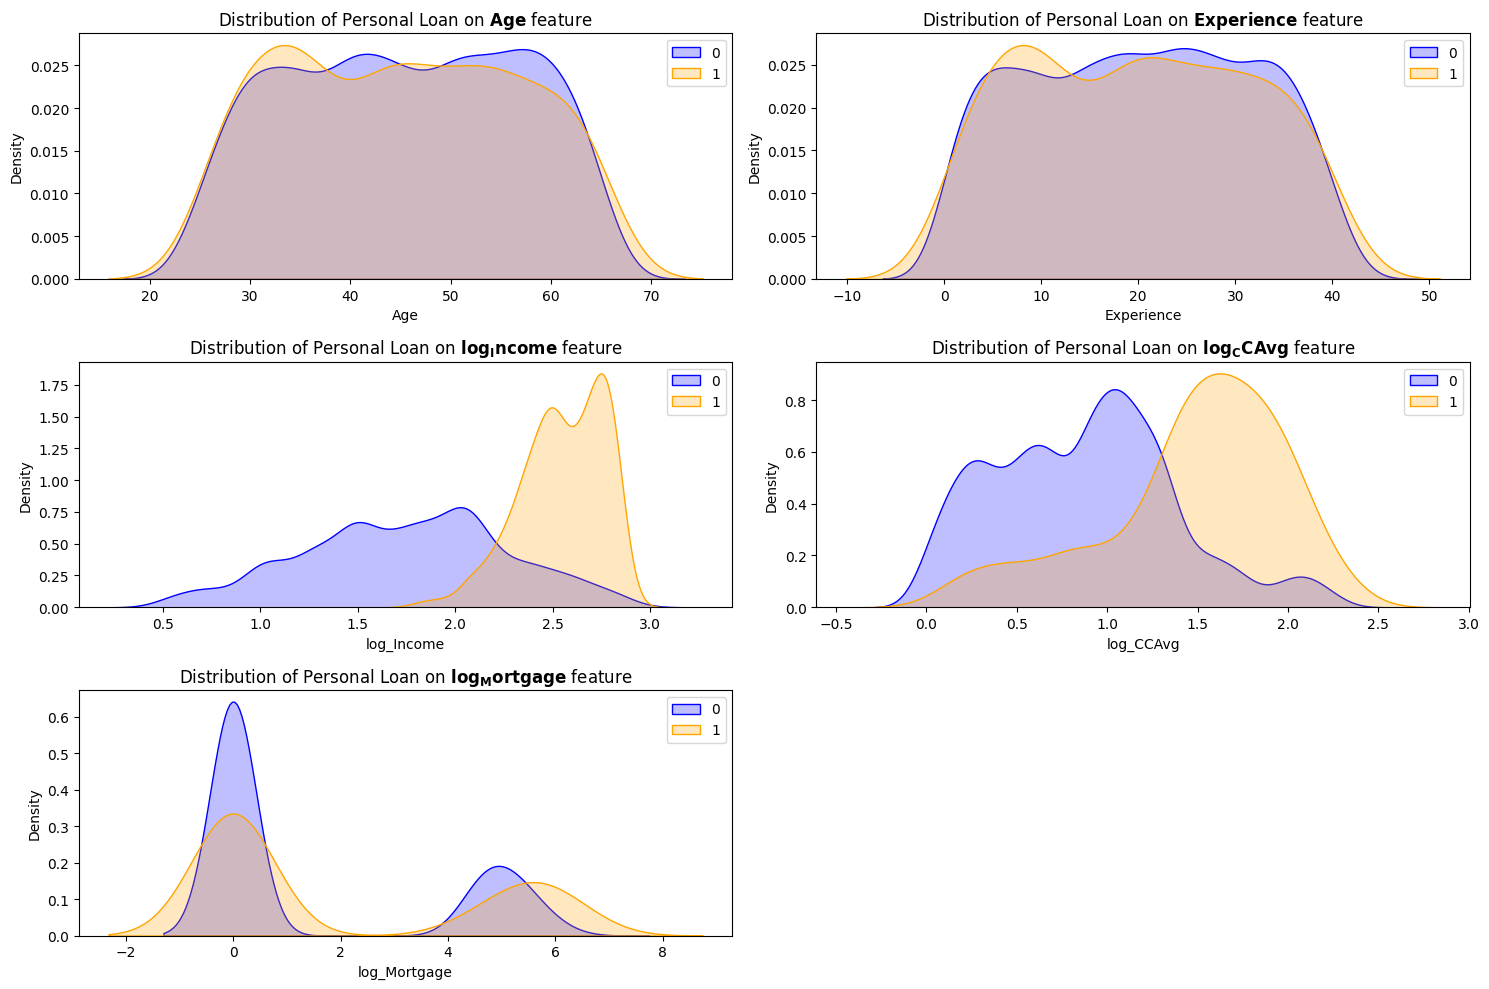

In [27]:
plt.figure(figsize=(18,12))
for i,col in enumerate(continuous_col.columns):
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[col],hue = df['Personal Loan'],kde=True)
    plt.title(f"Personal Loan Vs $\\mathbf{{{col}}}$",fontsize=18)

plt.tight_layout()
plt.show()

#############################################################################
print('\n')
print('*'*120)

plt.figure(figsize=(15,10))
for i,col in enumerate(continuous_col.columns):
    plt.subplot(3,2,i+1)
    color=['blue','orange']
    for j in list(df['Personal Loan'].unique()) :
        sns.kdeplot(df[df['Personal Loan']==j][col],color=color[j],fill=True,label=j)
        plt.legend()
    plt.title(f"Distribution of Personal Loan on $\\mathbf{{{col}}}$ feature")
plt.tight_layout()
plt.show()

Plot ini menunjukkan jumlah dan distribusi pelanggan berdasarkan fitur continuous
- Age nasabah yang diberi pinjaman adalah (26-65).
- Plot Experience menunjukkan bahwa pelanggan dengan jumlah pengalaman berapa pun dapat diberikan pinjaman.
- Kisaran Income nasabah yang diberi pinjaman adalah (5-17.5), sebagian besar nasabah yang menerima pinjaman memiliki pendapatan pada kisaran (7.5-16.5).
- plot Income kde dengan jelas menunjukkan bahwa peluang untuk mendapatkan pinjaman meningkat dengan meningkatnya pendapatan.
- Sebagian besar Pelanggan memiliki CCAvge <=3 (sekitar 83% dari seluruh pelanggan) sehingga di antara pelanggan tersebut 95,98% yang tidak diberikan pinjaman dan 4,02% diberikan, juga lebih sedikit pelanggan yang memiliki CCAvg >3 (sekitar 17% dari seluruh pelanggan) dibandingkan diantaranya 36,87% yang diberi pinjaman dan 63,13% tidak diberikan. Jadi, persentase ini menunjukkan bahwa nilai CCAvg yang besar meningkatkan peluang diberikan pinjaman.
- Sebagian besar pelanggan tidak memiliki mortgage apa pun (mortgage=0).

Cek Data yang akan digunakan untuk pembuatan Model Machine Learning

In [28]:
df

,Age,Experience,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,log_Income,log_CCAvg,log_Mortgage
0,25,1,4,1,0,1,0,0,0,1.625967,0.955511,0.000000
1,45,19,3,1,0,1,0,0,0,1.343735,0.916291,0.000000
2,39,15,1,1,0,0,0,0,0,0.650588,0.693147,0.000000
3,35,9,1,2,0,0,0,0,0,2.233592,1.308333,0.000000
4,35,8,4,2,0,0,0,0,1,1.558145,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,1,3,0,0,0,1,0,1.466337,1.064711,0.000000
4996,30,4,4,1,0,0,0,1,0,0.810930,0.336472,4.454347
4997,63,39,2,3,0,0,0,0,0,1.098612,0.262364,0.000000
4998,65,40,3,2,0,0,0,1,0,1.625967,0.405465,0.000000


In [29]:
# Fungsi untuk mengubah logaritma ke nilai asli
def log_to_rupiah(log_value):
    return np.exp(log_value)

# Konversi nilai logaritma ke Rupiah
df['Income'] = df['log_Income'].apply(log_to_rupiah)
df['CCAvg'] = df['log_CCAvg'].apply(log_to_rupiah)
df['Mortgage'] = df['log_Mortgage'].apply(log_to_rupiah)

# Mengubah nilai ke format tanpa tanda titik
df['Income'] = (df['Income'] * 1000000).astype(int)
df['CCAvg'] = (df['CCAvg'] * 1000000).astype(int)
df['Mortgage'] = (df['Mortgage'] * 1000000).astype(int)

# Hapus kolom logaritma jika tidak diperlukan lagi
df = df.drop(columns=['log_Income', 'log_CCAvg', 'log_Mortgage'])

# Tampilkan DataFrame yang telah diperbarui
print(df)

      Age  Experience  Family  Education  Personal Loan  Securities Account  \
0      25           1       4          1              0                   1   
1      45          19       3          1              0                   1   
2      39          15       1          1              0                   0   
3      35           9       1          2              0                   0   
4      35           8       4          2              0                   0   
...   ...         ...     ...        ...            ...                 ...   
4995   29           3       1          3              0                   0   
4996   30           4       4          1              0                   0   
4997   63          39       2          3              0                   0   
4998   65          40       3          2              0                   0   
4999   28           4       3          1              0                   0   

      CD Account  Online  CreditCard   Income    CC

In [30]:
df

,Age,Experience,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income,CCAvg,Mortgage
0,25,1,4,1,0,1,0,0,0,5083333,2600000,1000000
1,45,19,3,1,0,1,0,0,0,3833333,2500000,1000000
2,39,15,1,1,0,0,0,0,0,1916666,2000000,1000000
3,35,9,1,2,0,0,0,0,0,9333333,3700000,1000000
4,35,8,4,2,0,0,0,0,1,4750000,2000000,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,1,3,0,0,0,1,0,4333333,2900000,1000000
4996,30,4,4,1,0,0,0,1,0,2250000,1400000,85999999
4997,63,39,2,3,0,0,0,0,0,2999999,1300000,1000000
4998,65,40,3,2,0,0,0,1,0,5083333,1500000,1000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 5000 non-null   int64
 1   Experience          5000 non-null   int64
 2   Family              5000 non-null   int64
 3   Education           5000 non-null   int64
 4   Personal Loan       5000 non-null   int64
 5   Securities Account  5000 non-null   int64
 6   CD Account          5000 non-null   int64
 7   Online              5000 non-null   int64
 8   CreditCard          5000 non-null   int64
 9   Income              5000 non-null   int64
 10  CCAvg               5000 non-null   int64
 11  Mortgage            5000 non-null   int64
dtypes: int64(12)
memory usage: 468.9 KB


In [32]:
df.isna().sum()

Age                   0
Experience            0
Family                0
Education             0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Income                0
CCAvg                 0
Mortgage              0
dtype: int64

# Model Training | Pelatihan Model

In [42]:
# Fungsi untuk memberikan bobot pada fitur berdasarkan rentang nilai yang berbeda
def apply_feature_weights(df, feature_weights, binary_weights=None, default_weight=0.5):
    df_weighted = df.copy()
    for feature, ranges in feature_weights.items():
        def weight_value(x):
            for lower, upper, weight in ranges:
                if lower <= x <= upper:
                    return x * weight
            return x * default_weight

        df_weighted[feature] = df_weighted[feature].apply(weight_value)

    if binary_weights:
        for feature, (weight_0, weight_1) in binary_weights.items():
            df_weighted[feature] = df_weighted[feature].apply(
                lambda x: x * weight_0 if x == 0 else x * weight_1)

    return df_weighted

# Mendefinisikan rentang nilai dan bobot untuk fitur-fitur tertentu
feature_weights = {
    'Age': [(18, 40, 2.0), (41, 60, 1.5), (61, np.inf, 1.0)],
    'Experience': [(0, 5, 1.0), (6, 10, 1.5), (11, np.inf, 2.0)],
    'Family': [(0, 2, 2.0), (3, 5, 1.5), (6, np.inf, 1.0)],
    'Income': [(0, 15000000, 1.0), (16000000, 30000000, 1.5), (31000000, np.inf, 2.0)],
    'CCAvg': [(0, 15000000, 2.0), (15000000, 45000000, 1.5), (45000000, np.inf, 1.0)],
    'Education': [(1, 1, 1.0), (2, 2, 1.5), (3, 3, 2.0)],
    'Mortgage': [(0, 500000000, 1.0), (501000000, 900000000, 1.5), (901000000, np.inf, 2.0)]
}

# Mendefinisikan bobot untuk fitur biner
binary_weights = {
    'Securities Account': (1.0, 1.5),
    'CD Account': (1.0, 2.0),
    'Online': (1.0, 1.5),
    'CreditCard': (1.0, 2.0),
}

In [43]:
# Memisahkan fitur dan label
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [44]:
# Menerapkan bobot pada fitur-fitur tertentu
X_weighted = apply_feature_weights(X, feature_weights, binary_weights)

In [45]:
# Membagi data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_weighted, y, test_size=0.2, stratify=y, random_state=42)

In [46]:
# Melatih model XGBoost dengan parameter yang sesuai
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    max_depth=4,             # Membatasi kedalaman pohon
    min_child_weight=3,      # Membatasi jumlah minimum sampel dalam node daun
    gamma=0.2,               # Membatasi node yang terbelah
    subsample=0.8,           # Pengambilan sampel data training secara acak
    colsample_bytree=0.8,    # Pengambilan sampel kolom secara acak
    learning_rate=0.1,       # Mengatur kecepatan pembelajaran
    n_estimators=100,        # Jumlah pohon dalam model
    early_stopping_rounds=10 # Penggunaan early stopping
)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [47]:
# Memprediksi dan mengevaluasi hasil
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [48]:
# Menggunakan metrik evaluasi yang sesuai
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       904
           1       0.75      0.95      0.83        96

    accuracy                           0.96      1000
   macro avg       0.87      0.96      0.91      1000
weighted avg       0.97      0.96      0.97      1000

ROC-AUC Score: 0.9952064896755162


In [49]:
# Menyimpan model ke dalam file dengan format .sav
filename = 'model_xgb.sav'
joblib.dump(model, filename)
print(f"Model saved to {filename}")

# Mengunduh file secara otomatis ke komputer lokal
files.download(filename)

Model saved to model_xgb.sav


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>